# Ch09. 주식데이터를 통해 groupby 사용하기

## 1. 데이터 이동하기 (shift)

### 학습 목표
- 데이터를 이동한다. (`shift` 함수)
- 데이터를 이동해 연산한다. (`diff`, `pct_change` 함수)

> pandas shift

<img src=https://i.ibb.co/vcxZn1B/09-01.png, width=600>

데이터를 정해진 칸만큼 이동시키는 함수


**periods** (정수)

이동할 칸을 지정하는 인자

**freq**

날짜나 시간 데이터를 shift 할 때 사용하는 인자
 
**axis** (0 or 1)

이동 방향을 지정하는 인자

<br><br>

[shift 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

In [ ]:
# 실습 준비 코드
import pandas as pd
data = [['01/01', 1000], ['01/02', 1200], ['01/03', 900], 
        ['01/04', 1200], ['01/05', 1500]]
df = pd.DataFrame(data, columns=['날짜', '가격'])
df

In [ ]:
# 데이터 프레임에 shift 함수 적용하기
df.shift()

In [ ]:
# shift 함수에 음수 입력하기
df.shift(-1)

In [ ]:
# 가로방향으로 shift하기
df.shift(axis=1)

In [ ]:
# 시리즈를 shift해서 가격변동 열 만들기
df1 = df.copy()
df1['가격변동'] = df1['가격'] - df1['가격'].shift()
df1

In [ ]:
# diff 함수로 가격변동 열 만들기
df1['가격변동'] = df1['가격'].diff()
df1

In [ ]:
# 시리즈를 shift해서 변동률 열 만들기
df1 = df.copy()
df1['변동률'] = (df1['가격'] - df1['가격'].shift()) / df1['가격'].shift()
df1

In [ ]:
# pct_change 함수로 열 만들기
df1['변동률'] = df1['가격'].pct_change()
df1

## 2. groupby가 필요한 이유

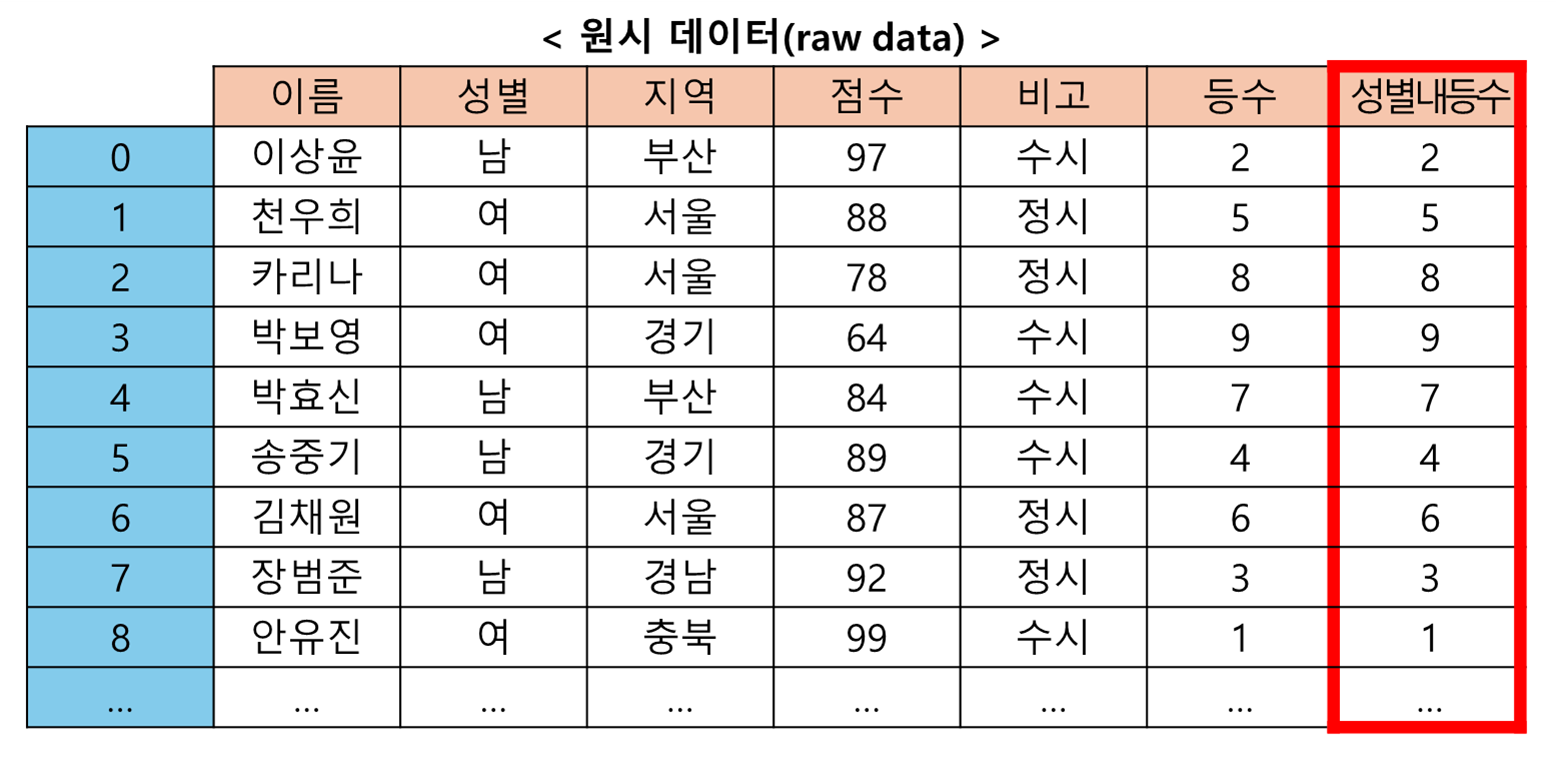

raw data에서 다른 열의 특성으로 그룹화해서 함수를 적용할 때 필요하다

→ raw data를 다룰 때는 매우 빈번한 일이다

예를 들어, 위 그림에서 성별 내 등수, 지역 내 등수 등을 구해야 하는 경우를 말한다

이런 경우, groupby로 성별 열로 그룹화한 후 rank 함수를 적용하면 성별 내 등수를 구할 수 있다 




## 3. groupby 함수 배우기

### 학습 목표
- 그룹화해서 함수를 적용한다. (`groupby` 함수)
- `groupby` 함수의 구조를 숙지한다.
- `groupby` 함수를 적용했을 때 차원축소함수와 일반 함수의 차이를 알게 된다.

> pandas groupby


<img src=https://i.ibb.co/5rk4LCy/09-03.png, width=600>

그룹 내에서 함수를 적용하게 해주는 함수


**by** 

그룹을 나누는 기준. 복수라면 리스트로 입력

 

**axis** (0 or 1)

그룹해서 함수를 행에 적용할 것인지 열에 적용할 것인지 지정하는 인자. 기본값은 열

 

**level**

인덱스로 그룹을 나눌 때 사용하는 인자

 

**as_index** (bool / 기본값은 True)

groupby로 집계 함수를 사용할 때 그룹이 인덱스가 될지 지정하는 인자

 

**sort** (bool / 기본값은 True)

그룹의 key로 정렬을 할 것인지 지정하는 인자

<br><br>

[groupby 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [ ]:
# 수업 준비 코드
import pandas as pd
data1 = [['이상윤', 'A', '남', 95], ['송중기', 'B', '남', 93],
         ['카리나', 'B', '여', 88], ['박효신', 'A', '남', 85],
         ['박보영', 'B', '여', 78], ['안유진', 'A', '여', 72]]

data2 = [['2021-01-01', '이상윤', 10000], ['2021-01-01', '박보영', 2000],
         ['2021-01-02', '이상윤', 20000], ['2021-01-02', '박보영', 5000],
         ['2021-01-03', '박보영', 8000], ['2021-01-03', '이상윤', 5000]]

df1 = pd.DataFrame(data1, columns=['이름', '반', '성별', '점수'])
df2 = pd.DataFrame(data2, columns=['날짜', '이름', '입금'])
df1

#### 일반적인 사용법 : `df.groupby(그룹의 기준)[함수를 적용할 열].적용할 함수호출`

In [ ]:
# 반으로 그룹화 해서 rank 함수 적용하기
df = df1.copy()
df['학급내등수'] = df.groupby('반')['점수'].rank(ascending=False)
df

In [ ]:
# 반과 성별로 그룹화 해서 rank 함수 적용하기
df = df1.copy()
df['등수2'] = df.groupby(['반', '성별'])['점수'].rank(ascending=False)
df

In [ ]:
# 적용할 함수로 집계함수 적용하기
df.groupby(['반', '성별'])['점수'].mean()

In [ ]:
# 피벗테이블과 같은 교차표 만들기
df.groupby(['반', '성별'])['점수'].mean().unstack()

<img src=https://i.ibb.co/hRFtSTb/groupby.jpg, width=600>

In [ ]:
df2

In [ ]:
# groupby로 shift 함수 적용하기
df2['전일입금'] = df2.groupby('이름')['입금'].shift()
df2

## 4. 파이썬 라이브러리를 통해 주식데이터 가져오기 (Finance Data Reader)

**Finance Data Reader**

한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리


<br><br>

**설치**



```python
import sys
!{sys.executable} -m pip install -U finance-datareader
```

<br>

**사용**
```python
import FinanceDataReader as fdr
```

<br>

**국내주식 데이터 가져오기**

`fdr.DataReader` 함수로 국내 주식 데이터를 가져올 수 있다

삼성전자 주가 데이터를 2018-01-01부터 2020-12-31까지 가져온다

```python
fdr.DataReader('005930', '2018-01-01', '2020-12-31')
```

2018년부터 2020년까지의 모든 데이터이므로 아래와 같은 코드도 가능하다


```python
fdr.DataReader('005930', '2018', '2021')
```

<br>

**차트 설정**

```python
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
```


<br>

**기간내 종가 변동 차트 그리기**

데이터 프레임이니까 `pandas`의 `plot` 함수로 그려보자

```python
fdr.DataReader('005930', '2018', '2021')['Close'].plot()
```

<br>

**캔들 차트 그리기**

`fdr.chart.plot` 함수로 캔들 차트를 그릴 수 있다

삼성전자의 2020년 1월 주가를 캔들차트로 그려보자

```python
df1 = fdr.DataReader('005930', '2020-01', '2020-02')
fdr.chart.candle(df1)
```

캔들 차트의 인자는 링크를 참조 : 
https://nbviewer.org/gist/FinanceData/c6c336c4727386810bec9264e81f6bba


<br><br>

그외 많은 기능들이 있으니 다음링크를 참조

<img src=https://i.imgur.com/r0YE5Xs.png, width=400>

https://financedata.github.io/posts/finance-data-reader-users-guide.html


In [ ]:
# finance data reader 설치
import sys
!{sys.executable} -m pip install -U finance-datareader bs4 plotly bokeh

In [ ]:
# 삼성전자의 주가 데이터를 2018년부터 2020년까지 모두 가져오기
import FinanceDataReader as fdr
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
fdr.DataReader('005930', '2018-01-01', '2020-12-31')

In [ ]:
# 연도로 가져올 수도 있다
fdr.DataReader('005930', '2018', '2021')

In [ ]:
# 차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [ ]:
# 종가 그래프 그리기
df = fdr.DataReader('005930', '2018-01-01', '2020-12-31')
df.head()
df['Close'].plot()

In [ ]:
# 캔들차트 그리기
df1 = fdr.DataReader('005930', '2020-01', '2020-02')
fdr.chart.candle(df1)

In [ ]:
# 삼성전자와 카카오 두개 종목의 주가데이터 합쳐서 불러오기
stocks = ['005930', '035720']
df_ex1 = pd.DataFrame()
for i in stocks:
  df = fdr.DataReader(i, '2018', '2021')
  df['Code'] = i
  df_ex1 = pd.concat([df_ex1, df])
df_ex1

**주식 종목 코드와 종목명 얻기**

- `FinanceDataReader`를 통해서 주가 데이터를 가져오려면 종목 코드가 필요하다

- `FinanceDataReader`도 기본적인 종목명과 코드를 제공하지만 보다 세부적인 지표와 함께 종목코드와 종목명을 얻기 위해 KRX 사이트를 이용하자

  <img src=https://i.ibb.co/ZNLKc86/09-04.png, width=600>

  http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201


- 단순히 종목코드와 종목명 뿐만 아니라 시가총액, 등락률 등으로 원하는 종목을 필터링해서 파일로 가져올 수 있다

- 파일에서 데이터 프레임을 불러낼 수 있으니 종목의 데이터를 활용할 수 있다


- 단순 실습을 원하는 경우 23-02-27 기준의 전종목 데이터를 미리 다운받아둔 `./09_01_stock_230227.csv` 파일을 이용하자

- 실제 주가 데이터를 업무에 활용하는 경우는 직접 다운받아서 활용하자

In [ ]:
# KRX 사이트에서 현시점 기준 시가총액 상위 90개의 종목 리스트 가져오기
url1 = './09_01_stock_230227.csv'
df_stocks = pd.read_csv(url1).iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 12]]
df_90 = df_stocks.sort_values('시가총액', ascending=False).iloc[:90, [0, 1]]
df_90

In [ ]:
# 현시점 기준 시가총액 상위 90개의 2018~2020년 주가 가져오기
stocks = df_90['종목코드'].tolist()
df_ex1 = pd.DataFrame()
for i in stocks:
  df = fdr.DataReader(i, '2018', '2021')
  df['Code'] = i
  df_ex1 = pd.concat([df_ex1, df])
df_ex1

현 시점 기준으로는 시총 상위 90개에 해당하지만 2020년에 상장하지 않은 종목들이 있어 90개 종목의 데이터는 아니다

In [ ]:
# 날짜를 열로 만들고 종목명도 붙혀주기
df_ex2 = df_ex1.reset_index().merge(df_90.set_axis(['Code', 'Stock'], axis=1), how='left')
df_ex2

In [ ]:
# 파일로 저장하기
df_ex2.to_csv('result_stocks.csv', index=False)

## 5. 2일 연속 급상승 주식 필터링하기

**데이터와 경로명** : 

현 시점 시총 상위 90개 종목의 2018~2020년의 주가 데이터 

(2020년까지 상장하지 않았던 종목 제외하면 81개)

<br>

**위 종목들 중에 2일 연속 20%이상 상승한 데이터만 필터링 해보자**

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = './09_02_stocks.csv'
df_ex2 = pd.read_csv(url, dtype={'Code':'str'})
df_ex2

In [ ]:
# 2거래일 연속 20%이상 상승한 데이터 필터링
cond1 = df_ex2['Change'] >= 0.2
cond2 = df_ex2.groupby('Stock')['Change'].shift() >= 0.2
df_ex2[cond1 & cond2]

결과가 맞는지 두산에너빌리티로 확인해보자

<img src=https://i.ibb.co/5RX6WpG/09-05-01.png, width=600>

## 6. 시리즈와 데이터프레임의 연산 (broad casting)

### 학습 목표
- 시리즈와 데이터 프레임의 연산 방식을 알게 된다. (`apply` 함수)

**시리즈와 데이터 프레임의 연산은 브로드 캐스팅(broad casting)을 한다**

<img src=https://i.ibb.co/1GrVPzq/09-06-01.png, width=600>

<img src=https://i.ibb.co/d5BwbVt/09-06-02.png, width=600>

먼저 시리즈의 눕혀진 다음 그 후 행방향으로 확장해서 데이터 프레임을 만들어 연산을 하는 것과 같다 (axis=1이며 기본값)

In [ ]:
# 실습 준비 코드
import pandas as pd
data = [[83, 66, 72], [87, 94, 98], [62, 71, 69], [94, 92, 72]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

In [ ]:
s1 = pd.Series([1, 2, 3], index=['국어', '영어', '수학'])
s1

In [ ]:
# 시리즈와 데이터 프레임의 연산 : 브로드 캐스팅
df + s1

In [ ]:
s2 = pd.Series([10, 0, 0, 10], index=list('ABCD'))
s2

In [ ]:
# 아래 연산은 연산 함수를 사용해 브로드 캐스팅의 축을 바꿔야 한다
df + s2

**broad casting의 방향 바꾸기**

<img src=https://i.ibb.co/4WV6S0z/09-06-03.png, width=600>

<img src=https://i.ibb.co/ZLYWJYf/09-06-04.png, width=600>

열 방향으로 확장시킨 것과 같은 결과를 얻으려면 axis=0으로 브로드 캐스팅을 해야한다

이것은 연산자로는 할 수 없고 연산 함수를 써야 한다

**연산자와 연산함수**

- 덧셈(+) : `add`
- 뺄셈(-) : `sub`
- 곱셈(*) : `mul`
- 나눗셈(/) : `div` 

In [ ]:
# 브로드 캐스팅은 axis=1이 기본값이다
df.add(s2, axis=0)

In [ ]:
# 비교연산도 브로드 캐스팅 할 수 있다
df > df.mean()

## 7. 신규 상장 주식의 주가 변동 추이 알아보기

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = './09_02_stocks.csv'
df_ex2 = pd.read_csv(url, dtype={'Code':'str'})
df_ex2

In [ ]:
# 신규상장 종목 리스트
new = ['에코프로비엠', '우리금융지주', '하이브', 'SK바이오팜', '카카오게임즈']
new

In [ ]:
# 신규 상장 종목만 필터링
cond1 = df_ex2['Stock'].isin(new)
df_ex3 = df_ex2[cond1].copy()
df_ex3

In [ ]:
# 상장일부터 지난 일수를 알려주는 Days열을 만들기
df_ex3['Days'] = df_ex3.groupby('Stock')['Date'].rank().astype('int')
df_ex3

In [ ]:
# 30일 내의 데이터만 필터링해서 종목별 종가를 피벗테이블로 만들기
cond2 = df_ex3['Days'] <= 30
df_ex4 = df_ex3[cond2].pivot_table('Close', index='Days', columns='Stock')
df_ex4

In [ ]:
# 주가를 상장 첫날 종가의 비율로 나타내기
df_ex4 / df_ex4.iloc[0]